In [1]:
import matplotlib.pyplot as plt
import mpl_styles

plt.style.use(mpl_styles.diploma)

In [2]:
import pywt
import numpy as np
import scipy.signal as signal

dict(zip(pywt.families(short=True), pywt.families(short=False)))

{'haar': 'Haar',
 'db': 'Daubechies',
 'sym': 'Symlets',
 'coif': 'Coiflets',
 'bior': 'Biorthogonal',
 'rbio': 'Reverse biorthogonal',
 'dmey': 'Discrete Meyer (FIR Approximation)',
 'gaus': 'Gaussian',
 'mexh': 'Mexican hat wavelet',
 'morl': 'Morlet wavelet',
 'cgau': 'Complex Gaussian wavelets',
 'shan': 'Shannon wavelets',
 'fbsp': 'Frequency B-Spline wavelets',
 'cmor': 'Complex Morlet wavelets'}

In [3]:
set(pywt.wavelist('cmor') + pywt.wavelist('cgau')) & set(pywt.wavelist(kind='continuous'))

{'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor'}

In [4]:
morlet_wl = pywt.ContinuousWavelet('cmor1.5-1.0')
{a: getattr(morlet_wl, a) for a in dir(morlet_wl) if not a.startswith('_')}

{'bandwidth_frequency': 1.5,
 'biorthogonal': False,
 'center_frequency': 1.0,
 'complex_cwt': True,
 'dt': numpy.float64,
 'family_name': 'Complex Morlet wavelets',
 'family_number': 0,
 'fbsp_order': None,
 'lower_bound': -8.0,
 'name': 'cmor1.5-1.0',
 'number': 0,
 'orthogonal': False,
 'short_family_name': 'cmor',
 'symmetry': 'asymmetric',
 'upper_bound': 8.0,
 'wavefun': <function ContinuousWavelet.wavefun>}

In [5]:
print(morlet_wl)

ContinuousWavelet cmor1.5-1.0
  Family name:    Complex Morlet wavelets
  Short name:     cmor
  Symmetry:       asymmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


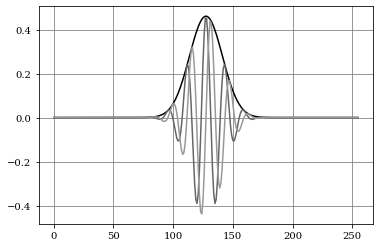

In [6]:
psi, x = morlet_wl.wavefun()  # two np arrays with `len = level ** 2`

plt.plot(np.abs(psi), label='abs')
plt.plot(np.real(psi), label='real')
plt.plot(np.imag(psi), label='imag')

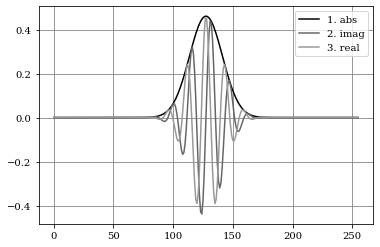

In [7]:
plt.plot(np.abs(psi), label='1. abs')
plt.plot(np.imag(psi), label='2. imag')
plt.plot(np.real(psi), label='3. real')
# plt.plot(np.real(signal.hilbert(np.real(psi))), label='4. real real')  # same as real
# plt.plot(np.real(signal.hilbert(np.imag(psi))), label='5. real imag')  # same as imag
# plt.plot(np.imag(signal.hilbert(np.real(psi))), label='6. imag real')  # same as imag
# plt.plot(np.imag(signal.hilbert(np.imag(psi))), label='7. imag imag')  # shift to right
# plt.plot(np.real(signal.hilbert(np.abs(psi))), label='8. real abs')  # same as abs
# plt.plot(np.imag(signal.hilbert(np.abs(psi))), label='9. imag abs')  # lol
# plt.plot(np.abs(signal.hilbert(np.abs(psi))), label='10. abs abs')  # higher
# plt.plot(np.abs(signal.hilbert(np.real(psi))), label='11. abs real')  # same as abs
# plt.plot(np.abs(signal.hilbert(np.imag(psi))), label='12. abs imag')  # same as abs
plt.legend()

In [8]:
print(pywt.central_frequency(morlet_wl))

1.0


255


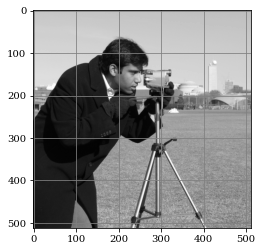

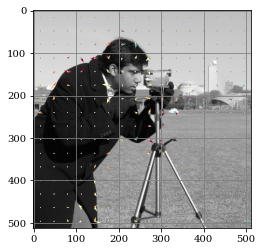

In [9]:
import dtcwt 
import dtcwt.plotting as plotting

plotting.hold = lambda x: None
plt.cm.spectral = plt.cm.Spectral

picture = pywt.data.camera()

mandrill_t = dtcwt.Transform2d().forward(picture, nlevels=5)

plt.imshow(picture, cmap='gray')
print(picture.max())
plt.figure()
plotting.overlay_quiver(picture, mandrill_t.highpasses[-1], 5, 0.5)

# Sine + DTCWT

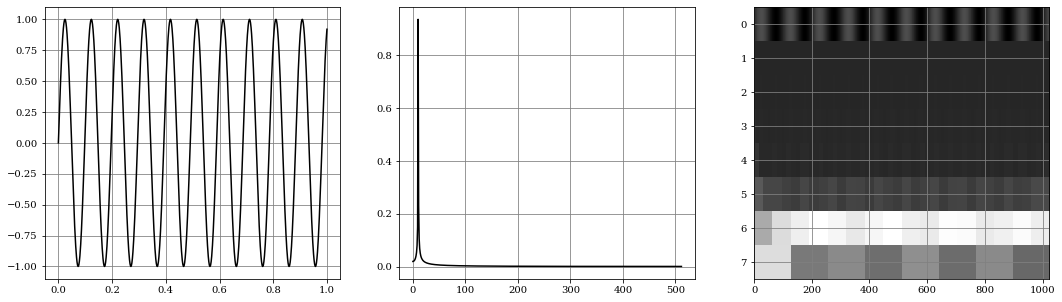

In [10]:
import dtcwt
import dtcwt.defaults
import helpers


def get_dtcwt(sample, biort_name=dtcwt.defaults.DEFAULT_BIORT):
    transform = dtcwt.Transform1d(biort_name).forward(sample, nlevels=7)
    im = np.empty((8, len(sample)), dtype=sample.dtype)
    im[0] = y
    for i, hp in enumerate(transform.highpasses):
        im[i+1] = np.abs(hp).repeat(2**(i+1))
    return im

x, dt = np.linspace(0, 1, 1024, retstep=True)
y = np.sin(x*2**6)

plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot(x, y)
plt.subplot(132)
plt.plot(*helpers.fourier_image(y, dt))
plt.subplot(133)
plt.imshow(get_dtcwt(y), aspect="auto", interpolation='none')

# Biorthogonal

h0o
[[ 0.          0.02674876]
 [ 1.         -0.01686412]
 [ 2.         -0.07822327]
 [ 3.          0.26686412]
 [ 4.          0.60294902]
 [ 5.          0.26686412]
 [ 6.         -0.07822327]
 [ 7.         -0.01686412]
 [ 8.          0.02674876]]
h0o - АЧХ
[[0.00000000e+00 2.22222222e-01]
 [1.00000000e+00 2.11385514e-01]
 [2.00000000e+00 2.00108266e-01]
 [3.00000000e+00 7.86291493e-02]
 [4.00000000e+00 1.71497770e-03]]
h1o
[[ 0.          0.04563588]
 [ 1.         -0.02877176]
 [ 2.         -0.29563588]
 [ 3.          0.55754353]
 [ 4.         -0.29563588]
 [ 5.         -0.02877176]
 [ 6.          0.04563588]]
h1o - АЧХ
[[0.00000000e+00 4.75809868e-17]
 [1.00000000e+00 3.41323525e-02]
 [2.00000000e+00 2.27961660e-01]
 [3.00000000e+00 2.95449514e-01]]
h0o
[[ 0.    -0.125]
 [ 1.     0.25 ]
 [ 2.     0.75 ]
 [ 3.     0.25 ]
 [ 4.    -0.125]]
h0o - АЧХ
[[0.        0.4      ]
 [1.        0.4427051]
 [2.        0.1072949]]
h1o
[[ 0.   -0.25]
 [ 1.    0.5 ]
 [ 2.   -0.25]]
h1o - АЧХ
[[0.  0. 

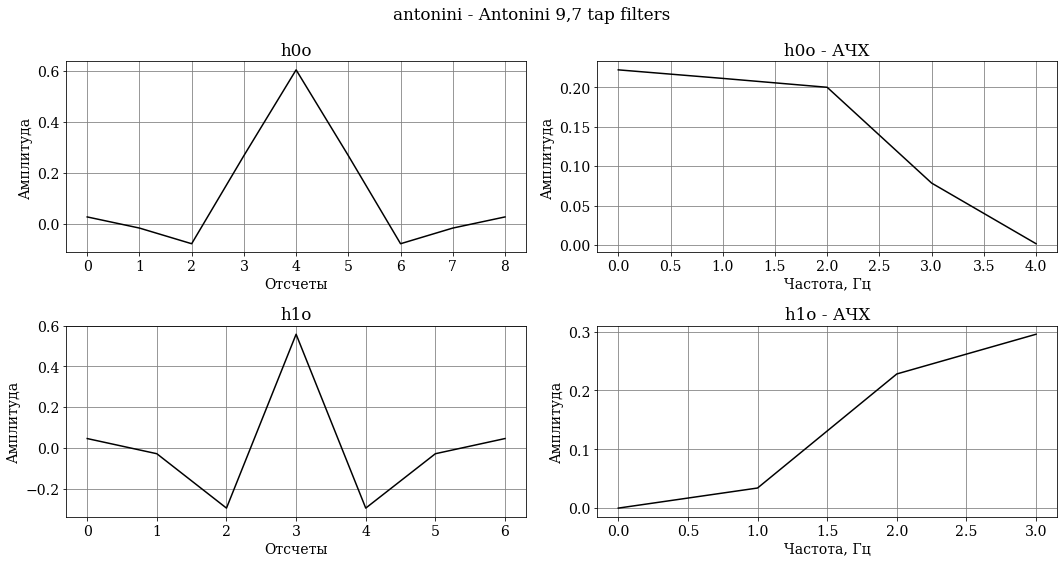

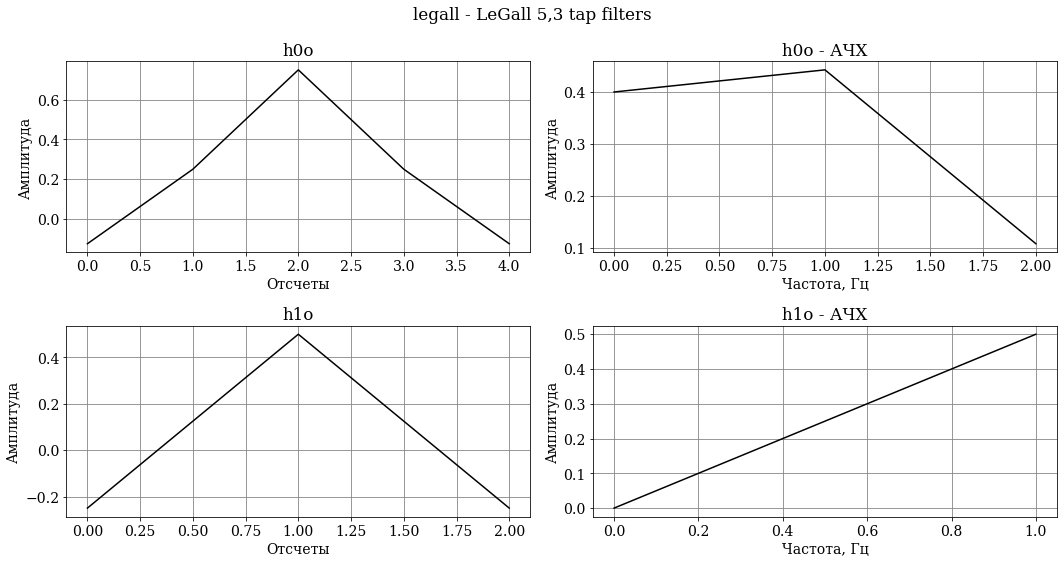

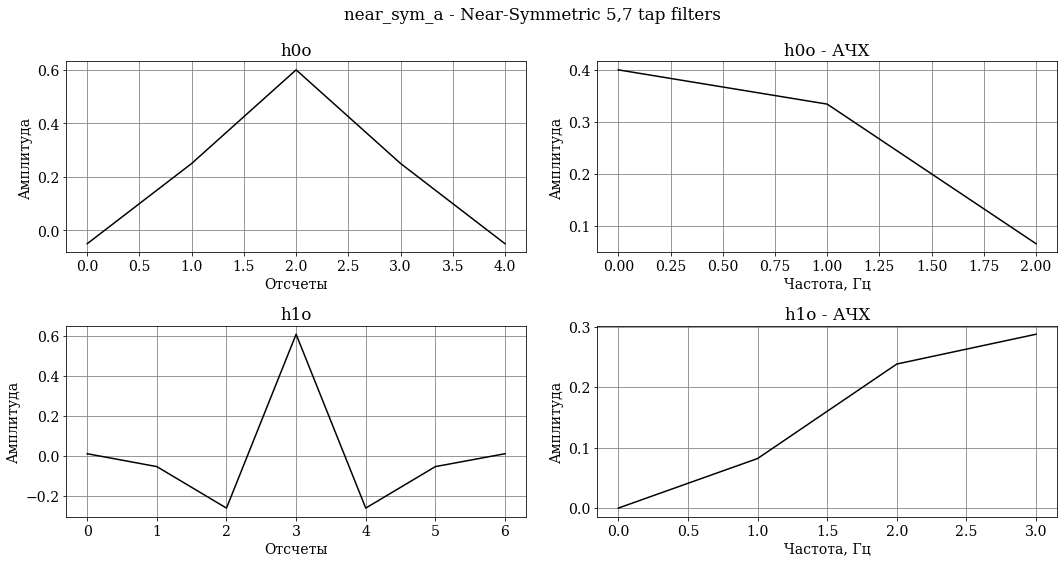

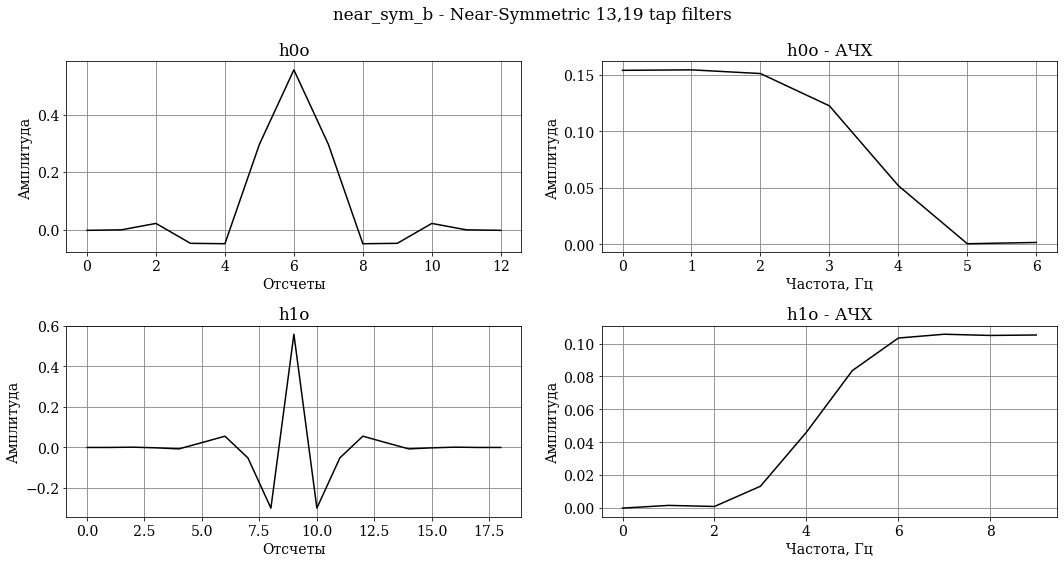

In [27]:
from dtcwt.coeffs import biort, qshift
import helpers

wavelets = ('antonini', 'legall', 'near_sym_a', 'near_sym_b')
descriptions = (
    "Antonini 9,7 tap filters",
    "LeGall 5,3 tap filters",
    "Near-Symmetric 5,7 tap filters",
    "Near-Symmetric 13,19 tap filters",
    "Near-Symmetric 13,19 tap filters + BP filter",
)
filter_names = ('h0o', 'g0o', 'h1o', 'g1o')
for wavelet, desc in zip(wavelets, descriptions):
    filts = [(f, n) for f, n in zip(biort(wavelet), filter_names) if n.startswith('h')]
    fig, axs = plt.subplots(2, len(filts), figsize=(15, 8))
    fig.suptitle(f'{wavelet} - {desc}')
    axs = axs.T
    for ax, ax2, (filt, filt_name) in zip(axs[0], axs[1], filts):
        filt = filt[:, 0]
        
        ax.set_title(filt_name)
        [line] = ax.plot(np.arange(len(filt)), filt)
        ax.set_xlabel('Отсчеты')
        ax.set_ylabel('Амплитуда')
        print(filt_name)
        print(line.get_xydata())

        ax2.set_title(f'{filt_name} - АЧХ')
        [line] = ax2.plot(*helpers.fourier_image(filt, 1/len(filt)))
        ax2.set_xlabel('Частота, Гц')
        ax2.set_ylabel('Амплитуда')
        print(f'{filt_name} - АЧХ')
        print(line.get_xydata())
        
    fig.tight_layout()
    fig.savefig(f'out/dtcwt_filters/{wavelet}.png')

# Q-Shift

qshift_06
h0a
[[ 0.          0.03516384]
 [ 1.          0.        ]
 [ 2.         -0.08832942]
 [ 3.          0.23389032]
 [ 4.          0.76027237]
 [ 5.          0.5875183 ]
 [ 6.          0.        ]
 [ 7.         -0.11430184]
 [ 8.          0.        ]
 [ 9.          0.        ]]
h0a - АЧХ
[[0.00000000e+00 2.82842712e-01]
 [1.00000000e+00 2.82750465e-01]
 [2.00000000e+00 2.57097156e-01]
 [3.00000000e+00 1.17902724e-01]
 [4.00000000e+00 7.22321205e-03]
 [5.00000000e+00 4.44089210e-17]]
h0b
[[ 0.          0.        ]
 [ 1.          0.        ]
 [ 2.         -0.11430184]
 [ 3.          0.        ]
 [ 4.          0.5875183 ]
 [ 5.          0.76027237]
 [ 6.          0.23389032]
 [ 7.         -0.08832942]
 [ 8.          0.        ]
 [ 9.          0.03516384]]
h0b - АЧХ
[[0.00000000e+00 2.82842712e-01]
 [1.00000000e+00 2.82750465e-01]
 [2.00000000e+00 2.57097156e-01]
 [3.00000000e+00 1.17902724e-01]
 [4.00000000e+00 7.22321205e-03]
 [5.00000000e+00 4.44089210e-17]]
h1a
[[ 0.          0. 

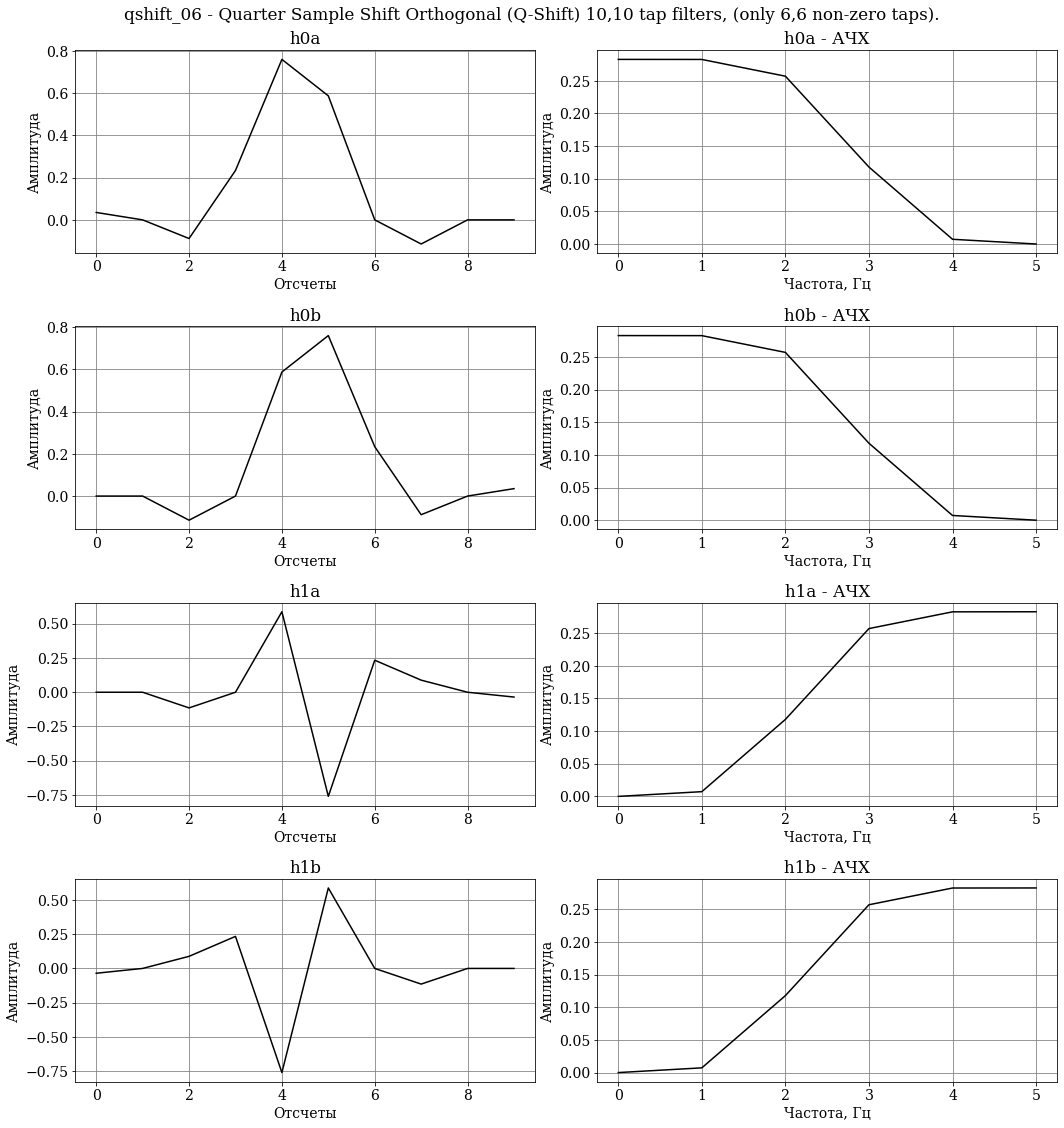

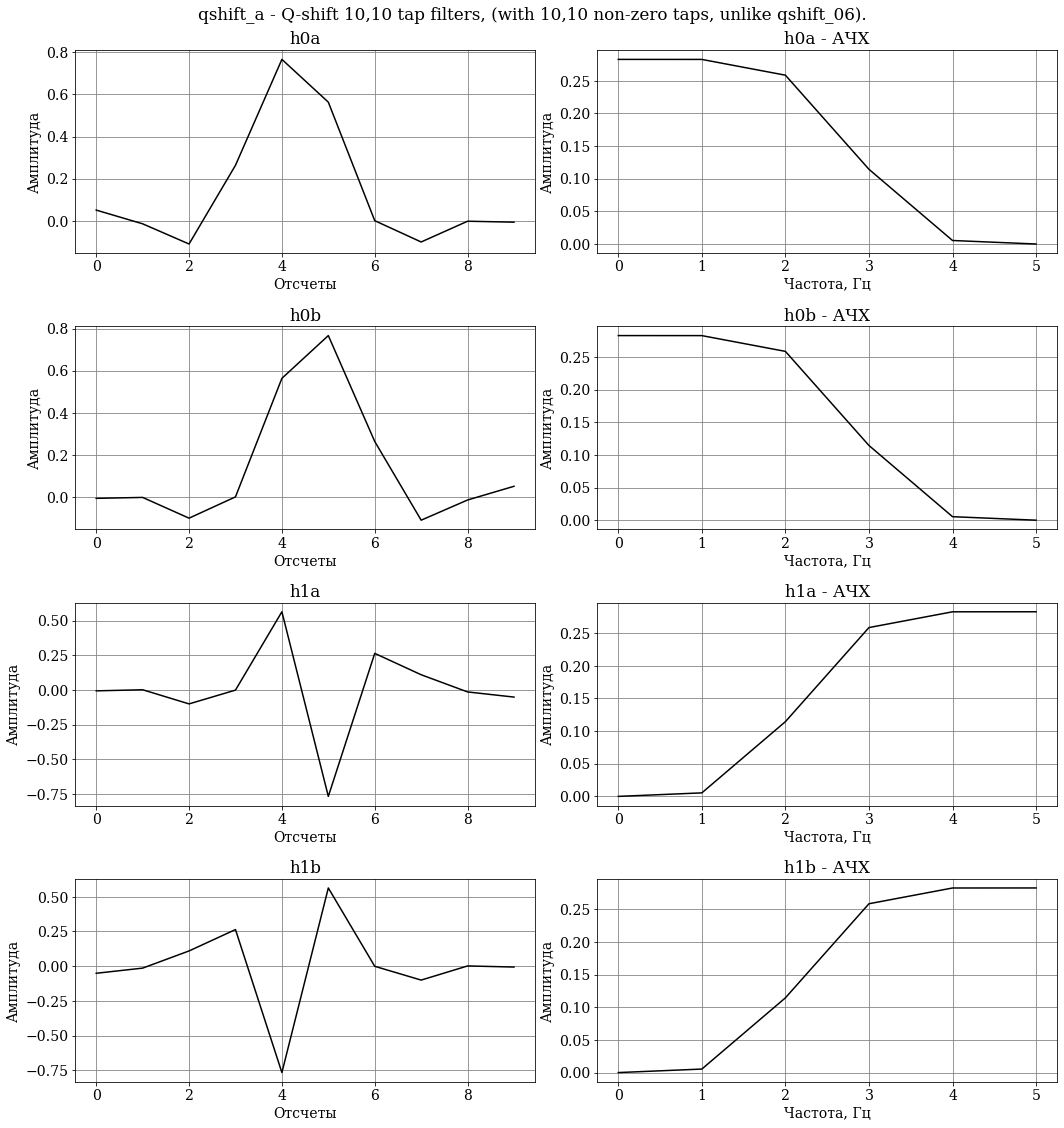

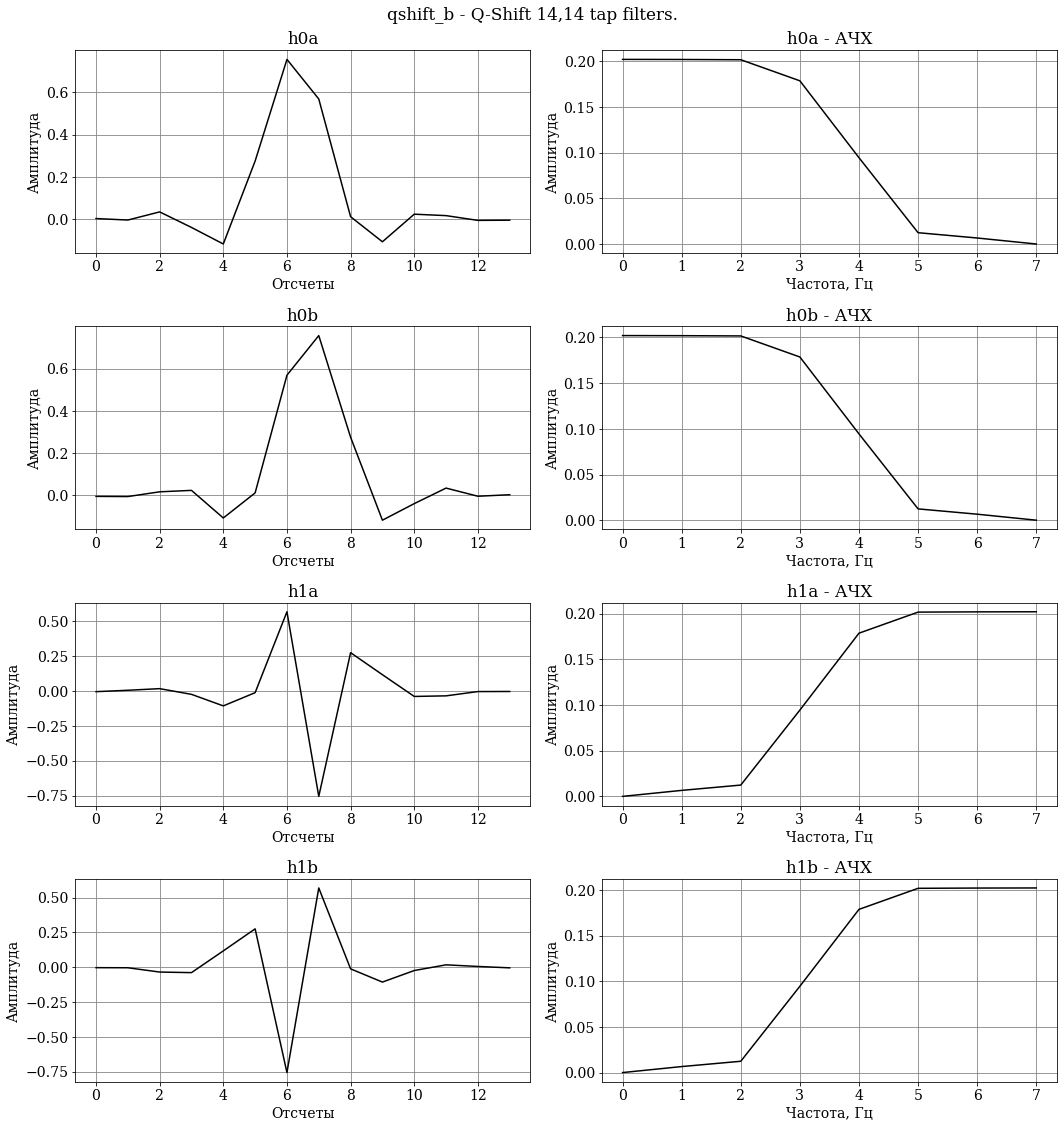

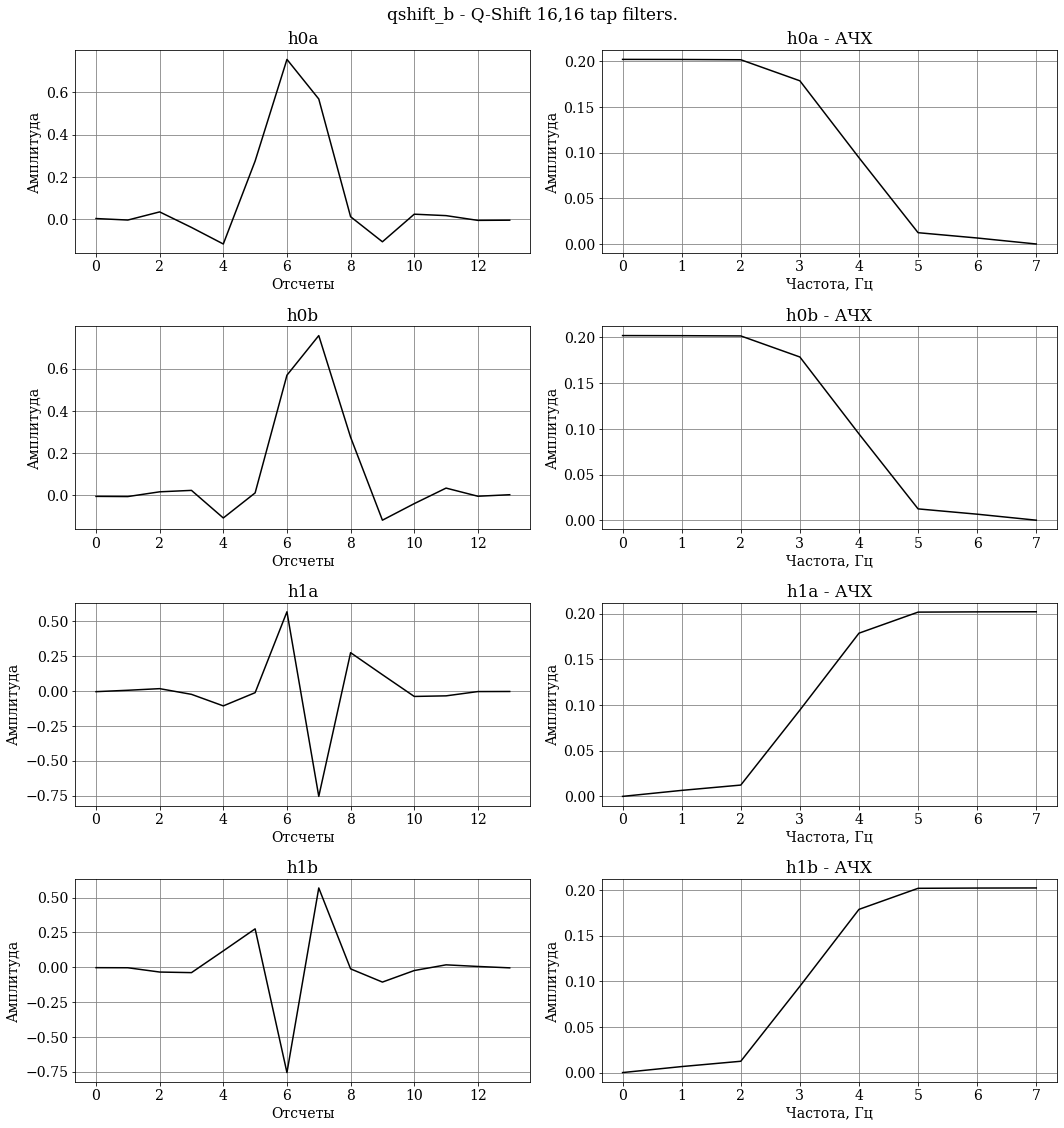

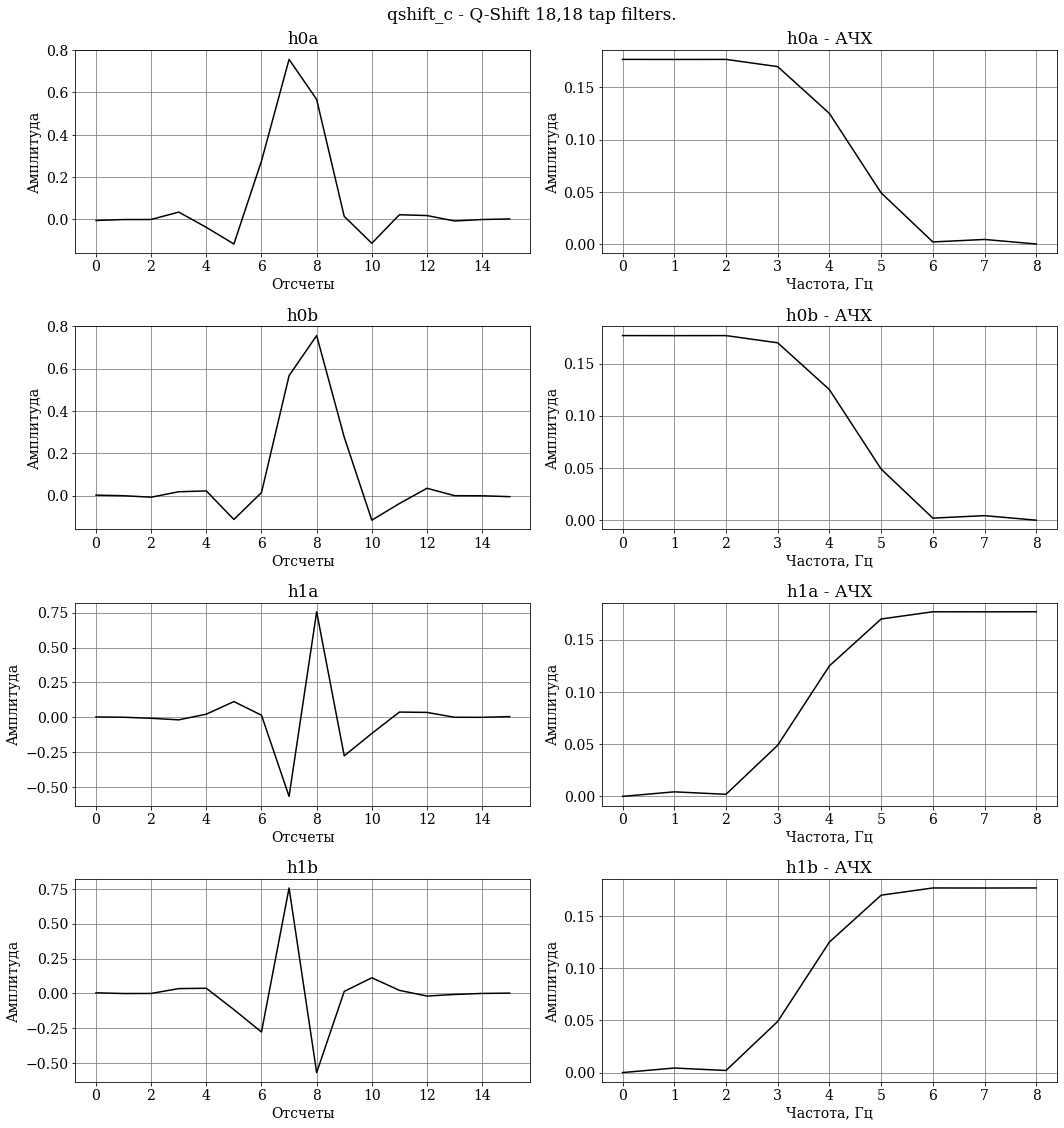

In [30]:
filter_names = ('h0a', 'h0b', 'g0a', 'g0b', 'h1a', 'h1b', 'g1a', 'g1b')
wavelet_names = ('qshift_06', 'qshift_a', 'qshift_b', 'qshift_b', 'qshift_c', 'qshift_d')
wavelet_descriptions = (
    "Quarter Sample Shift Orthogonal (Q-Shift) 10,10 tap filters, (only 6,6 non-zero taps).",
    "Q-shift 10,10 tap filters, (with 10,10 non-zero taps, unlike qshift_06).",
    "Q-Shift 14,14 tap filters.",
    "Q-Shift 16,16 tap filters.",
    "Q-Shift 18,18 tap filters.",
)

for wavelet, desc in zip(wavelet_names, wavelet_descriptions):
    filts = [(f, n) for f, n in zip(qshift(wavelet), filter_names) if n.startswith('h')]

    fig, axs = plt.subplots(len(filts), 2, figsize=(15, 16))
    fig.suptitle(f'{wavelet} - {desc}')
    axs = axs.T
    print(wavelet)

    for ax, ax2, (filt, filt_name) in zip(axs[0], axs[1], filts):
        filt = filt[:, 0]
        ax.set_title(filt_name)
        [line] = ax.plot(np.arange(len(filt)), filt)
        ax.set_xlabel('Отсчеты')
        ax.set_ylabel('Амплитуда')
        print(filt_name)
        print(line.get_xydata())

        ax2.set_title(f'{filt_name} - АЧХ')
        [line] = ax2.plot(*helpers.fourier_image(filt, 1/len(filt)))
        ax2.set_xlabel('Частота, Гц')
        ax2.set_ylabel('Амплитуда')
        print(f'{filt_name} - АЧХ')
        print(line.get_xydata())

    fig.tight_layout()
    fig.savefig(f'out/dtcwt_filters/{wavelet}.png')